# COURSE: A deep understanding of deep learning
## SECTION: ANNs
### LECTURE: ANN for regression
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401

In [73]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

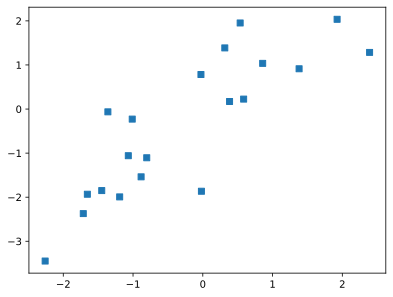

In [ ]:
# create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

In [75]:
# build model
ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [76]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer (the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [77]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs)


## Train the model!
for epochi in range(numepochs):

  # forward pass
  yHat = ANNreg(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

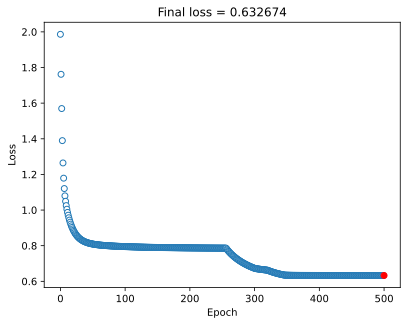

In [78]:
# show the losses

# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [79]:
testloss

tensor(0.6327, grad_fn=<MeanBackward0>)

In [80]:
testloss.item()

0.6326742768287659

In [81]:
testloss.detach()

tensor(0.6327)

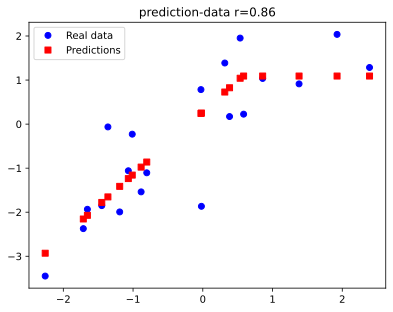

In [82]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Additional explorations

In [83]:
# 1) How much data is "enough"? Try different values of N and see how low the loss gets. 
#    Do you still get low loss ("low" is subjective, but let's say loss<.25) with N=10? N=5?
# 
# 2) Does your conclusion above depend on the amount of noise in the data? Try changing the noise level
#    by changing the division ("/2") when creating y as x+randn.
# 
# 3) Notice that the model doesn't always work well. Put the original code (that is, N=30 and /2 noise)
#    into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
#    Then count the number of times the model had a loss>.25.

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Function to create and train the model
def train_model():
    N = 30
    X = torch.rand(N, 1)
    y = 2 * X + 1 + torch.normal(0, 0.5, (N, 1))/2

    model = SimpleModel()
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    for epoch in range(100):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()

    return loss.item()

# Repeat the training 100 times and count the number of times the loss is greater than 0.25
count = 0
for _ in range(100):
    loss = train_model()
    if loss > 0.25:
        count += 1

print(f"Number of times the model had a loss > 0.25: {count}")

Number of times the model had a loss > 0.25: 18


In [87]:
def BuildModel(x,y):
    ANNreg = nn.Sequential(
    nn.Linear(1,1),  # input layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer
    )
    
    
    # learning rate
    learningRate = .05

    # loss function
    lossfun = nn.MSELoss()

    # optimizer (the flavor of gradient descent to implement)
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=learningRate)
    
    # train the model
    numepochs = 500
    losses = torch.zeros(numepochs)


    ## Train the model!
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNreg(x)

        # compute loss
        loss = lossfun(yHat,y)
        losses[epochi] = loss

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNreg(x)
        
    return predictions, losses

In [88]:
def CreateData(m):
    N = 50
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x, y

In [89]:
m_values = np.linspace(-2, 2, 21)
results = []

for m in m_values:
    losses = []
    for _ in range(50):
        x, y = CreateData(m)
        predictions, loss = BuildModel(x, y)
        losses.append(loss[-1].item())
    results.append((m, np.mean(losses), np.std(losses)))

# Print the results
for m, mean_loss, std_loss in results:
    print(f"m = {m:.2f}, Mean Loss = {mean_loss:.4f}, Std Dev = {std_loss:.4f}")

m = -2.00, Mean Loss = 1.3280, Std Dev = 1.7995
m = -1.80, Mean Loss = 1.0034, Std Dev = 1.3916
m = -1.60, Mean Loss = 0.9879, Std Dev = 1.1684
m = -1.40, Mean Loss = 0.6695, Std Dev = 0.8222
m = -1.20, Mean Loss = 0.5610, Std Dev = 0.6250
m = -1.00, Mean Loss = 0.4937, Std Dev = 0.4687
m = -0.80, Mean Loss = 0.4251, Std Dev = 0.2794
m = -0.60, Mean Loss = 0.3557, Std Dev = 0.1863
m = -0.40, Mean Loss = 0.2926, Std Dev = 0.0779
m = -0.20, Mean Loss = 0.2595, Std Dev = 0.0506
m = 0.00, Mean Loss = 0.2348, Std Dev = 0.0439
m = 0.20, Mean Loss = 0.2472, Std Dev = 0.0440
m = 0.40, Mean Loss = 0.2809, Std Dev = 0.0963
m = 0.60, Mean Loss = 0.3271, Std Dev = 0.1684
m = 0.80, Mean Loss = 0.3794, Std Dev = 0.2615
m = 1.00, Mean Loss = 0.5054, Std Dev = 0.4817
m = 1.20, Mean Loss = 0.7369, Std Dev = 0.6646
m = 1.40, Mean Loss = 0.9394, Std Dev = 0.9221
m = 1.60, Mean Loss = 1.0615, Std Dev = 1.2476
m = 1.80, Mean Loss = 0.9346, Std Dev = 1.3284
m = 2.00, Mean Loss = 1.2120, Std Dev = 1.6325
